In [1]:
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
df = pd.read_csv('../../data/merged_cleaned_data/deaths_merged_data_svi_val_cols.csv')
df.head()

,Unnamed: 0,FIPS,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,...,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,BEDS,first_year_deaths
0,0,1001,594.443459,55200,23315,21115,8422,1065,29372,4204,...,77.925476,78.222354,91.106719,53.333333,82.142857,70.000000,60.380952,27.018365,85.0,99
1,1,1009,644.830460,57645,24222,20600,8220,909,22656,7861,...,78.764620,78.193105,92.045455,57.603815,79.307632,64.953288,76.000000,9.569378,40.0,131
2,2,1013,776.838201,20025,10026,6708,4640,567,20430,2141,...,78.563680,76.109761,76.623924,69.058104,79.956648,67.920284,72.773953,41.789629,94.0,66
3,3,1015,605.867251,115098,53682,45033,20819,4628,24706,12620,...,79.439032,79.955121,77.918741,54.063568,76.745724,67.456150,68.292794,29.845243,552.0,305
4,4,1017,596.560643,33826,16981,13516,5531,773,22827,4383,...,76.995358,78.156771,75.891100,67.343775,79.128558,66.397785,69.554441,41.644857,115.0,117


In [3]:
#set index to FIPS
df = df.set_index(df['FIPS'])
df= df.drop(['FIPS','Unnamed: 0'], axis=1)

In [4]:
df = df.drop(index = 6037)

In [5]:
# #create variable for case% for each counties population
# df['case_pct'] = df['first_year_deaths']/df['E_TOTPOP']*100
# df['case_pct'].head()

In [6]:
# df['case_pct'].describe()

In [7]:
# # bin and cut the case_pct column into 2 classifications
# # q = df['case_pct'].quantile(.75)
# q = df['case_pct'].quantile(.9)
# bins = [0, q , 40]
# labels = ['low','high']
# df['case_class'] = pd.cut(df['case_pct'], bins, labels = labels)
# df['case_class']

In [8]:
# df['case_class'].value_counts()

In [9]:
#drop unneeded columns
# df = df.drop('case_pct', axis =1)
# df

In [10]:
# #turn case % classifications into binary 
# df = pd.get_dummies(df, columns = ['case_class'])
# df

## RF Regressor

In [11]:
df.shape

(3057, 43)

In [12]:
# Define feature set (x)
X = df.drop(['first_year_deaths'], axis=1)

#Define (y)
y= df['first_year_deaths']

In [13]:
X.columns.to_list()

['AREA_SQMI',
 'E_TOTPOP',
 'E_HU',
 'E_HH',
 'E_POV',
 'E_UNEMP',
 'E_PCI',
 'E_NOHSDP',
 'E_AGE65',
 'E_AGE17',
 'E_DISABL',
 'E_SNGPNT',
 'E_MINRTY',
 'E_LIMENG',
 'E_MUNIT',
 'E_MOBILE',
 'E_CROWD',
 'E_NOVEH',
 'E_GROUPQ',
 'E_UNINSUR',
 'E_DAYPOP',
 'Agreeableness',
 'Belief In Science',
 'Collectivism',
 'Conflict Awareness',
 'Conscientiousness',
 'Empathy',
 'Employment Rate',
 'Entrepreneurship',
 'Extraversion',
 'Gender Equality',
 'Hopefulness',
 'Income Per Capita',
 'Neuroticism',
 'Openness',
 'Religiosity',
 'Risk Taking',
 'Selflessness',
 'Tolerance',
 'Work Ethic',
 'dem_pct',
 'BEDS']

In [14]:
# # frequency histogram to see how many counties are high risk and low risk
# plt.hist(df["case_pct"])
# plt.xlabel("High Risk Counties")
# plt.ylabel("Frequency")
# plt.show()

In [15]:
#split data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 ,random_state= 42) 

In [16]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2139, 42)
(918, 42)
(2139,)
(918,)


In [17]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [19]:
# from pprint import pprint
# # Look at parameters used by our current forest
# print('Parameters currently in use:\n')
# pprint(rf.get_params())

In [20]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 150, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

In [21]:
# from sklearn.model_selection import RandomizedSearchCV

# # Use the random grid to search for best hyperparameters
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train_scaled, y_train)

In [22]:
# #view best parameters 
# rf_random.best_params_

In [23]:
# # to ignore division errors for zeros
# np.seterr(invalid='ignore')

In [24]:
#check zeros in y_test
zeros = np.where(y_test ==0)
print(zeros)

(array([ 20,  60, 108, 166, 201, 244, 265, 368, 425, 516, 561, 635, 654,
       780, 896]),)


In [25]:
#check for zeros
n_zeros= zeros[0].size
print (n_zeros)

15


In [26]:
# evaluate random search 


def evaluate(model, test_features, test_labels):
    predictions = model.predict(X_test_scaled)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / len(y_test))
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 200, random_state = 42)
base_model = base_model.fit(X_train_scaled, y_train)
base_accuracy = evaluate(base_model, X_test_scaled, y_test)

Model Performance
Average Error: 50.5256 degrees.
Accuracy = 94.50%.


In [27]:
# # evaluate performance with best_random estimator
# best_random = rf_random.best_estimator_
# random_accuracy = evaluate(best_random, X_test_scaled, y_test)

In [28]:
# # print the improvement 
# print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


In [29]:
preds = pd.DataFrame(base_model.predict(X_test_scaled))
preds

,0
0,134.310
1,50.430
2,6.095
3,12.625
4,238.705
...,...
913,19.865
914,45.240
915,9.620
916,42.940


In [30]:
actual = y_test.values
actual_df = pd.DataFrame(actual)
actual_df

,0
0,79
1,85
2,1
3,4
4,200
...,...
913,6
914,61
915,7
916,34


In [31]:
results = actual_df.merge(preds, how = 'inner', left_index=True, right_index=True)
results = results.rename(columns = {'0_x':'Actual', '0_y':'Pred'})
results

,Actual,Pred
0,79,134.310
1,85,50.430
2,1,6.095
3,4,12.625
4,200,238.705
...,...,...
913,6,19.865
914,61,45.240
915,7,9.620
916,34,42.940


In [47]:
results['error'] = abs(results['Actual']-results['Pred'])
results['error_pct'] = results['Pred']/results['Actual']*100
results

,Actual,Pred,error,error_pct
0,79,134.310,55.310,170.012658
1,85,50.430,34.570,59.329412
2,1,6.095,5.095,609.500000
3,4,12.625,8.625,315.625000
4,200,238.705,38.705,119.352500
...,...,...,...,...
913,6,19.865,13.865,331.083333
914,61,45.240,15.760,74.163934
915,7,9.620,2.620,137.428571
916,34,42.940,8.940,126.294118


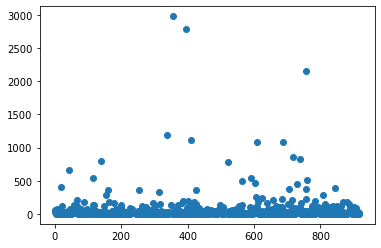

In [33]:
plt.scatter(results.index,results['error'])

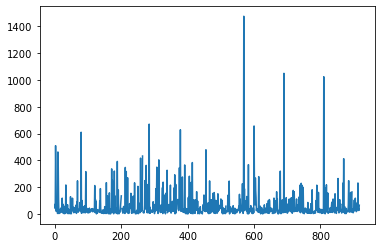

In [41]:
plt.plot(results['error_pct'])

In [34]:
results[results['error']==results['error'].max()]

,Actual,Pred,error
355,9662,6681.01,2980.99


In [42]:
results['error_pct'].describe()

count    918.000000
mean            inf
std             NaN
min        0.055233
25%       14.504227
50%       29.709995
75%       59.488158
max             inf
Name: error_pct, dtype: float64

In [38]:
df.loc[df['first_year_deaths']==9662]

,AREA_SQMI,E_TOTPOP,E_HU,E_HH,E_POV,E_UNEMP,E_PCI,E_NOHSDP,E_AGE65,E_AGE17,...,Neuroticism,Openness,Religiosity,Risk Taking,Selflessness,Tolerance,Work Ethic,dem_pct,BEDS,first_year_deaths
FIPS,,,,,,,,,,,,,,,,,,,,,
36047,69.371458,2600747,1035746,950856,544622,91531,31984,326469,343548,599759,...,80.16236,84.371639,61.648984,70.833333,70.473522,79.102853,67.857143,76.415176,5831.0,9662


In [39]:
df['first_year_deaths'].describe()

count    3057.000000
mean      166.784429
std       532.580273
min         0.000000
25%        18.000000
50%        47.000000
75%       110.000000
max      9673.000000
Name: first_year_deaths, dtype: float64